In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('G:\St. Clair College\Sem - 3\DAB - 303 (Marketing Analytics)\Individual project/german_credit_data.csv')

In [3]:
data.columns

Index(['Unnamed: 0', 'Age', 'Sex', 'Job', 'Housing', 'Saving accounts',
       'Checking account', 'Credit amount', 'Duration', 'Purpose', 'Risk'],
      dtype='object')

In [4]:
data.shape

(1000, 11)

In [5]:
# checking the head of the data
data.head()

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,2,49,male,1,own,little,NaN,2096,12,education,good
3,3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,4,53,male,2,free,little,little,4870,24,car,bad


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        1000 non-null   int64 
 1   Age               1000 non-null   int64 
 2   Sex               1000 non-null   object
 3   Job               1000 non-null   int64 
 4   Housing           1000 non-null   object
 5   Saving accounts   817 non-null    object
 6   Checking account  606 non-null    object
 7   Credit amount     1000 non-null   int64 
 8   Duration          1000 non-null   int64 
 9   Purpose           1000 non-null   object
 10  Risk              1000 non-null   object
dtypes: int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
data.describe()

,Unnamed: 0,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,499.500000,35.546000,1.904000,3271.258000,20.903000
std,288.819436,11.375469,0.653614,2822.736876,12.058814
min,0.000000,19.000000,0.000000,250.000000,4.000000
25%,249.750000,27.000000,2.000000,1365.500000,12.000000
50%,499.500000,33.000000,2.000000,2319.500000,18.000000
75%,749.250000,42.000000,2.000000,3972.250000,24.000000
max,999.000000,75.000000,3.000000,18424.000000,72.000000


In [8]:
data.isnull().sum()

Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [9]:
data = data.drop(columns="Unnamed: 0")

In [10]:
data.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [11]:
data["Saving accounts"].unique()

array([nan, 'little', 'quite rich', 'rich', 'moderate'], dtype=object)

In [12]:
data["Checking account"].unique()

array(['little', 'moderate', nan, 'rich'], dtype=object)

<AxesSubplot:xlabel='Credit amount', ylabel='Duration'>

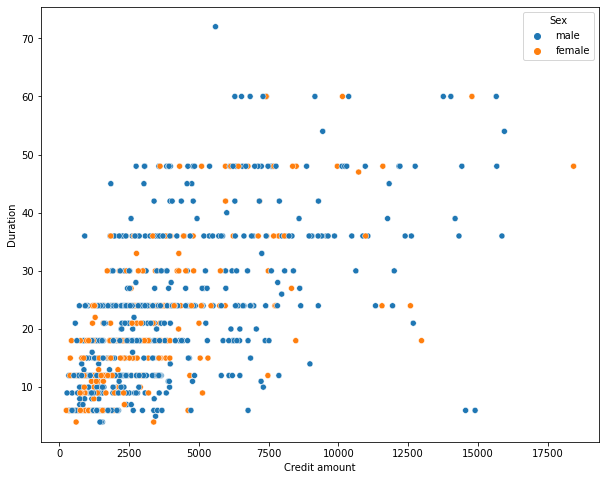

In [13]:
fig, ax1 = plt.subplots(figsize=(10,8))
sns.scatterplot(x="Credit amount",y="Duration",hue="Sex", data=data, ax=ax1)

<AxesSubplot:xlabel='Age', ylabel='Count'>

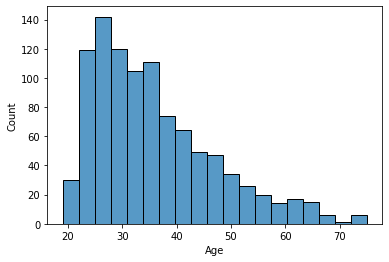

In [14]:
#lets plot histogram, boxplot and Q-Q plot to understand more about this column
sns.histplot(data.Age)

<AxesSubplot:xlabel='Age'>

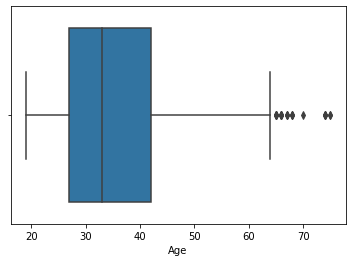

In [15]:
#boxplot
sns.boxplot(x = data.Age)

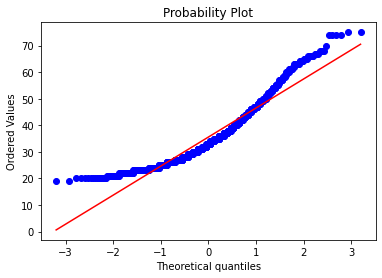

In [16]:
#Q-Q plot
from scipy import stats
%matplotlib inline
import pylab
stats.probplot(data.Age, dist = "norm", plot = pylab)
plt.show()

A normal probability plot, or more specifically a quantile-quantile (Q-Q) plot, shows the distribution of the data against the expected normal distribution. For normally distributed data, observations should lie approximately on a straight line. If the data is non-normal, the points form a curve that deviates markedly from a straight line. Possible outliers are points at the ends of the line, distanced from the bulk of the observations. In our observation, as we can see that the distribution is not quite normal.

In [17]:
#We will analyse sex column now.
data.Sex.value_counts()

male      690
female    310
Name: Sex, dtype: int64

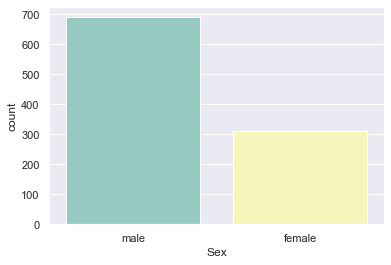

In [18]:
#plotting bar graph
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = data.Sex, palette="Set3")

In [19]:
#We will analyse job column now.
data.Job.value_counts()

2    630
1    200
3    148
0     22
Name: Job, dtype: int64

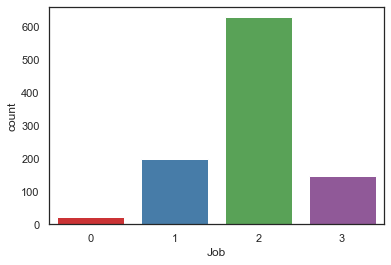

In [20]:
#plotting bar graph
sns.set_theme(style="white")
ax = sns.countplot(x = data.Job, palette="Set1")

In [21]:
#We will analyse Saving accounts column now.
data['Saving accounts'].value_counts()

little        603
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [22]:
#checking for missing values
data['Saving accounts'].isna().sum()

183

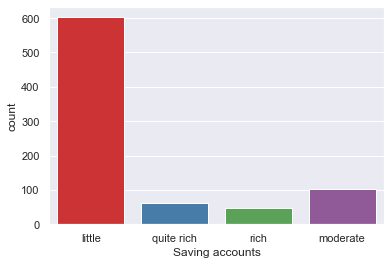

In [23]:
#plotting bar graph
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = data['Saving accounts'], palette="Set1")

In [24]:
#We wll do mode imputer since this is a dicrete data
from sklearn.impute import SimpleImputer

In [25]:
#mode imputer
mode_imputer = SimpleImputer(missing_values = np.nan, strategy = 'most_frequent')

In [26]:
data['Saving accounts'] = mode_imputer.fit_transform(data[['Saving accounts']])

In [27]:
data['Saving accounts'].value_counts()

little        786
moderate      103
quite rich     63
rich           48
Name: Saving accounts, dtype: int64

In [28]:
#checking for missing values
data['Saving accounts'].isna().sum()

0

In [29]:
#We will analyse Checking account column now.
data['Checking account'].value_counts()

little      274
moderate    269
rich         63
Name: Checking account, dtype: int64

In [30]:
#checking for missing values
data['Checking account'].isna().sum()

394

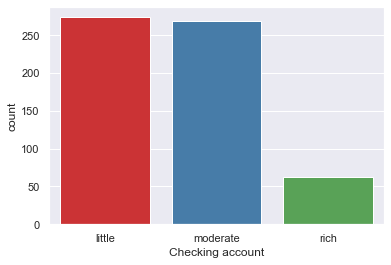

In [31]:
#plotting bar graph
sns.set_theme(style="darkgrid")
ax = sns.countplot(x = data['Checking account'], palette="Set1")

In [32]:
data['Checking account'] = mode_imputer.fit_transform(data[['Checking account']])

In [33]:
#We will analyse Checking account column now.
data['Checking account'].value_counts()

little      668
moderate    269
rich         63
Name: Checking account, dtype: int64

In [34]:
#checking for missing values
data['Checking account'].isna().sum()

0

<AxesSubplot:xlabel='Credit amount', ylabel='Count'>

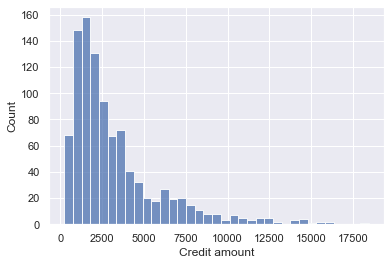

In [35]:
sns.histplot(data['Credit amount'])

<AxesSubplot:xlabel='Credit amount'>

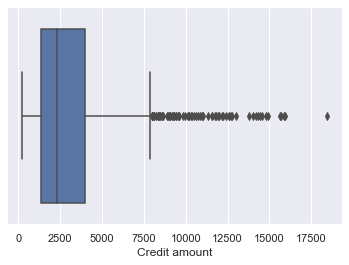

In [36]:
#boxplot
sns.boxplot(x=data['Credit amount'])

<AxesSubplot:xlabel='Duration'>

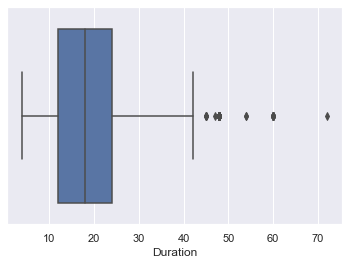

In [37]:
#boxplot
sns.boxplot(x=data.Duration)

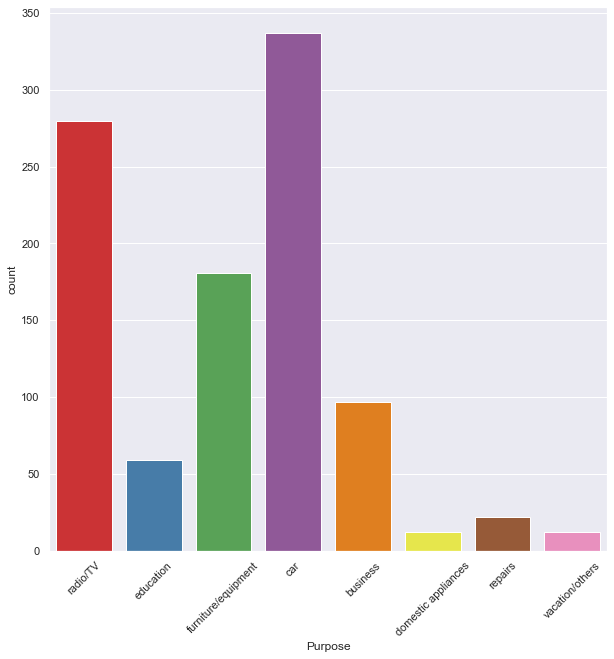

In [38]:
#plotting bar graph
fig, ax = plt.subplots(figsize=(10, 10))
sns.set_theme(style="white")
ax = sns.countplot(x=data['Purpose'], palette="Set1")
plt.xticks(rotation=45)
plt.show()

In [39]:
pip install feature_engine

Note: you may need to restart the kernel to use updated packages.


In [40]:
#winsorizing 
from feature_engine.outliers import Winsorizer
winsor = Winsorizer(capping_method ='iqr', tail = 'both', fold = 1.5, variables = ['Age','Credit amount', 'Duration'])

In [41]:
#To remove the null value as well
credit_winsorized = winsor.fit_transform(data)

<AxesSubplot:xlabel='Credit amount'>

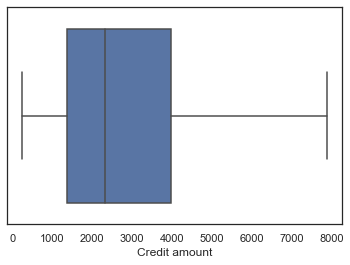

In [42]:
#checking for the success of winsorization
sns.boxplot(x = credit_winsorized['Credit amount'])

<AxesSubplot:xlabel='Duration'>

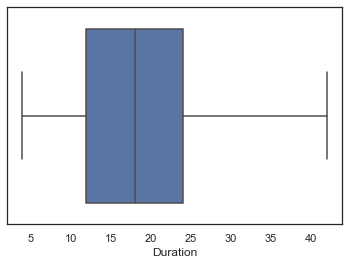

In [43]:
#checking for the success of winsorization
sns.boxplot(x = credit_winsorized['Duration'])

In [44]:
credit_winsorized.describe()

,Age,Job,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,35.453500,1.904000,3051.101000,20.307000
std,11.106324,0.653614,2187.140403,10.615151
min,19.000000,0.000000,250.000000,4.000000
25%,27.000000,2.000000,1365.500000,12.000000
50%,33.000000,2.000000,2319.500000,18.000000
75%,42.000000,2.000000,3972.250000,24.000000
max,64.500000,3.000000,7882.375000,42.000000


In [45]:
credit_winsorized.isnull().sum()

Age                 0
Sex                 0
Job                 0
Housing             0
Saving accounts     0
Checking account    0
Credit amount       0
Duration            0
Purpose             0
Risk                0
dtype: int64

In [46]:
credit_winsorized.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   float64
 1   Sex               1000 non-null   object 
 2   Job               1000 non-null   int64  
 3   Housing           1000 non-null   object 
 4   Saving accounts   1000 non-null   object 
 5   Checking account  1000 non-null   object 
 6   Credit amount     1000 non-null   float64
 7   Duration          1000 non-null   float64
 8   Purpose           1000 non-null   object 
 9   Risk              1000 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 78.2+ KB


In [47]:
credit_winsorized.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,64.5,male,2,own,little,little,1169.0,6.0,radio/TV,good
1,22.0,female,2,own,little,moderate,5951.0,42.0,radio/TV,bad
2,49.0,male,1,own,little,little,2096.0,12.0,education,good
3,45.0,male,2,free,little,little,7882.0,42.0,furniture/equipment,good
4,53.0,male,2,free,little,little,4870.0,24.0,car,bad


In [48]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, StratifiedKFold

x = data.drop('Risk', axis=1)
y = data['Risk']

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)

print('xtrain shape: ', x_train.shape)
print('xtest shape: ', x_test.shape)
print('ytrain shape: ', y_train.shape)
print('ytest shape: ', y_test.shape)

xtrain shape:  (800, 9)
xtest shape:  (200, 9)
ytrain shape:  (800,)
ytest shape:  (200,)


In [49]:
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [50]:
temp1 = MultiColumnLabelEncoder(columns = ['Housing','Saving accounts', 'Sex', 'Checking account', 'Risk']).fit_transform(credit_winsorized)
temp1.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,64.5,1,2,1,0,0,1169.0,6.0,radio/TV,1
1,22.0,0,2,1,0,1,5951.0,42.0,radio/TV,0
2,49.0,1,1,1,0,0,2096.0,12.0,education,1
3,45.0,1,2,0,0,0,7882.0,42.0,furniture/equipment,1
4,53.0,1,2,0,0,0,4870.0,24.0,car,0


In [51]:
temp = pd.get_dummies(temp1.Purpose, prefix='Purpose')
clean_data = pd.concat([temp1, temp], axis=1)

In [52]:
clean_data = clean_data.drop('Purpose', axis = 1)

In [53]:
X = clean_data.drop("Risk", axis = 1)
y = clean_data['Risk']

### MODEL

In [54]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

def Naive_Bayes(X_train,y_train):
    gnb = GaussianNB()
    y_pred = gnb.fit(X_train, y_train).predict(X_test)
    return y_pred

def KNN(X_train,y_train):
    neigh = KNeighborsClassifier(n_neighbors=2)
    y_pred = neigh.fit(X_train, y_train).predict(X_test)
    return y_pred

def Svm(X_train, y_train):
    from sklearn import svm
    clf = svm.SVC(decision_function_shape='ovo')
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    return y_pred

def Decision_Tree(X_train,y_train):
    clf = DecisionTreeClassifier(random_state=100)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    return y_pred

def Random_Forest(X_train,y_train):
    clf = RandomForestClassifier(max_depth=2, random_state=0)
    y_pred = clf.fit(X_train, y_train).predict(X_test)
    return y_pred

### Confusion matrix

In [55]:
from sklearn.metrics import confusion_matrix

def c_matrix(y_test,y_pred):
    matrix = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix, annot = True, fmt = 'g')
    plt.title("Confussion Matrix", fontsize = 20)

### Evaluate result

In [56]:
from sklearn.metrics import precision_score, accuracy_score, recall_score,f1_score

def performance(y_test,y_pred):
    print(f" accuracy score is {accuracy_score(y_test, y_pred)}" )
    print(f" precision score is {precision_score(y_test, y_pred, average='macro')}")
    print(f" recall score is {recall_score(y_test, y_pred, average='macro')}")
    print(f" F1 score is {f1_score(y_test, y_pred, average='macro')}")

### Naive Bayes Model

 accuracy score is 0.7
 precision score is 0.6033138401559455
 recall score is 0.5788690476190476
 F1 score is 0.5828118481435127


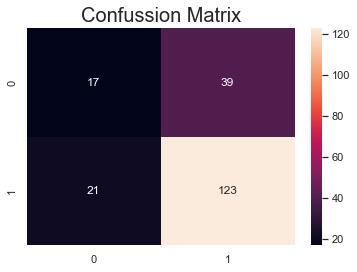

In [57]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Fitting classifier to the Training set
y_pred = Naive_Bayes(X_train, y_train)

# Make the Confusion Matrix
c_matrix(y_test, y_pred)

# Evaluate the results
performance(y_test,y_pred)

### KNN

 accuracy score is 0.495
 precision score is 0.5111546578233344
 recall score is 0.5140791476407915
 F1 score is 0.4750383325970009


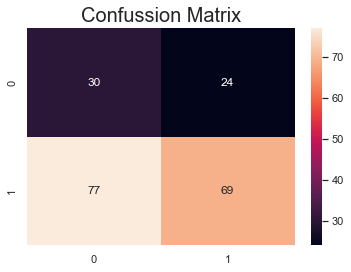

In [58]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Fitting classifier to the Training set
y_pred = KNN(X_train, y_train)

# Make the Confusion Matrix
c_matrix(y_test, y_pred)

# Evaluate the results
performance(y_test,y_pred)

### SVM

 accuracy score is 0.715
 precision score is 0.3575
 recall score is 0.5
 F1 score is 0.41690962099125367


C:\Users\Priyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


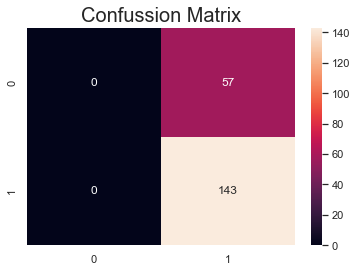

In [59]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Fitting classifier to the Training set
y_pred = Svm(X_train, y_train)

# Make the Confusion Matrix
c_matrix(y_test, y_pred)

# Evaluate the results
performance(y_test,y_pred)

### Decision Tree Classification Model

 accuracy score is 0.595
 precision score is 0.5362957937584804
 recall score is 0.5371915189433438
 F1 score is 0.5366000171629624


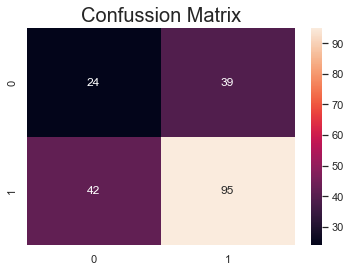

In [60]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Fitting classifier to the Training set
y_pred = Decision_Tree(X_train, y_train)

# Make the Confusion Matrix
c_matrix(y_test, y_pred)

# Evaluate the results
performance(y_test,y_pred)

### Random Forest Model

 accuracy score is 0.67
 precision score is 0.335
 recall score is 0.5
 F1 score is 0.4011976047904192


C:\Users\Priyan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


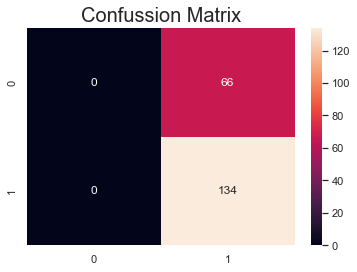

In [61]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

# Fitting classifier to the Training set
y_pred = Random_Forest(X_train, y_train)

# Make the Confusion Matrix
c_matrix(y_test, y_pred)

# Evaluate the results
performance(y_test,y_pred)